In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('data/train.csv')
df.tail(5)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black
26728,A706629,NaN,2015-07-02 09:00:00,Transfer,SCRP,Cat,Intact Male,1 year,Domestic Shorthair Mix,Brown Tabby/White


In [97]:
df.isnull().sum()

AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
IsNamed               0
dtype: int64

* **이름 유/무 컬럼 추가 (있으면 1, 없으면 0)**

In [55]:
df['IsNamed'] = df['Name'].apply(lambda x: 0 if pd.isnull(x) else 1)
df[['Name', 'IsNamed']].head(5)

,Name,IsNamed
0,Hambone,1
1,Emily,1
2,Pearce,1
3,NaN,0
4,NaN,0


* ** 나이 컬럼 추가 (단위를 day로 환산)**

In [107]:
df['Age'] = df[pd.notnull(df.AgeuponOutcome)]['AgeuponOutcome'].apply(lambda x: int(x.split()[0]) * 7 if 'week' in x \
                                                               else int(x.split()[0]) * 30 if 'month' in x \
                                                               else int(x.split()[0]) * 365 if 'year' in x \
                                                               else int(x.split()[0]) if 'day' in x \
                                                               else 0)

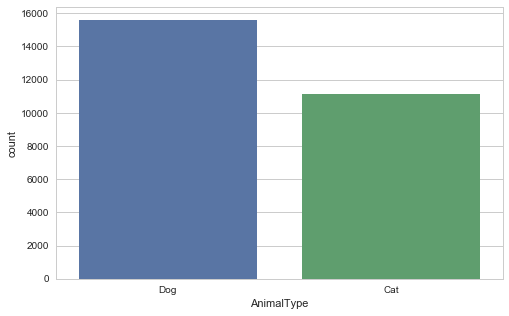

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df.AnimalType)

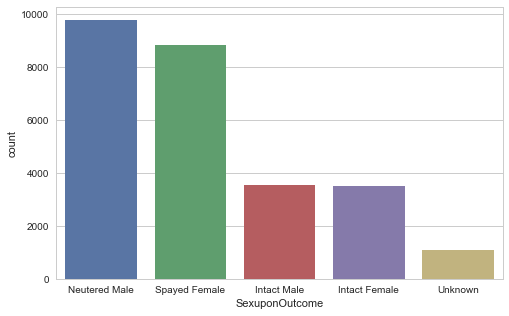

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df.SexuponOutcome)

In [18]:
df.groupby('AgeuponOutcome').size().sort_values(ascending=False)

AgeuponOutcome
1 year       3969
2 years      3742
2 months     3397
3 years      1823
1 month      1281
3 months     1277
4 years      1071
5 years       992
4 months      888
6 years       670
3 weeks       659
5 months      652
6 months      588
8 years       536
7 years       531
2 weeks       529
10 months     457
10 years      446
8 months      402
4 weeks       334
9 years       288
7 months      288
12 years      234
9 months      224
1 weeks       171
11 months     166
1 week        146
13 years      143
11 years      126
3 days        109
2 days         99
14 years       97
15 years       85
1 day          66
6 days         50
4 days         50
16 years       36
5 days         24
0 years        22
17 years       17
5 weeks        11
18 years       10
19 years        3
20 years        2
dtype: int64

In [19]:
df.groupby('Breed').size().sort_values(ascending=False)

Breed
Domestic Shorthair Mix                             8810
Pit Bull Mix                                       1906
Chihuahua Shorthair Mix                            1766
Labrador Retriever Mix                             1363
Domestic Medium Hair Mix                            839
German Shepherd Mix                                 575
Domestic Longhair Mix                               520
Siamese Mix                                         389
Australian Cattle Dog Mix                           367
Dachshund Mix                                       318
Boxer Mix                                           245
Miniature Poodle Mix                                233
Border Collie Mix                                   229
Australian Shepherd Mix                             163
Catahoula Mix                                       157
Rat Terrier Mix                                     157
Jack Russell Terrier Mix                            146
Domestic Shorthair                        

In [22]:
df.groupby('Color').size().sort_values(ascending=False)

Color
Black/White                    2824
Black                          2292
Brown Tabby                    1635
Brown Tabby/White               940
White                           931
Brown/White                     884
Orange Tabby                    841
Tan/White                       773
Tricolor                        752
Blue/White                      702
Black/Tan                       672
White/Black                     643
Brown                           639
Tan                             628
White/Brown                     569
Tortie                          530
Calico                          517
Orange Tabby/White              455
Blue                            450
Brown Brindle/White             450
Black/Brown                     436
Blue Tabby                      433
White/Tan                       389
Red                             337
Torbie                          335
Brown/Black                     333
Red/White                       331
Blue Tabby/White      

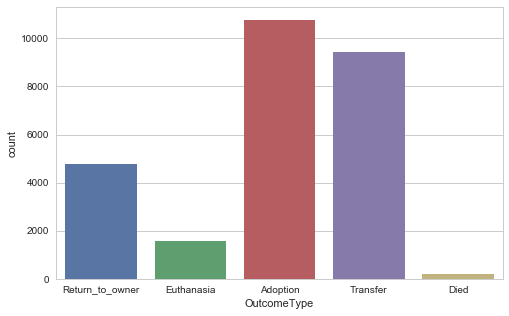

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df.OutcomeType)

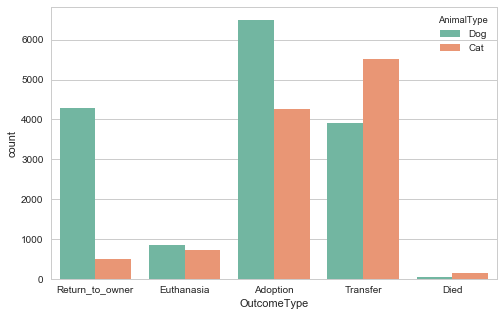

In [35]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df.OutcomeType, hue=df.AnimalType, data=df, palette="Set2")

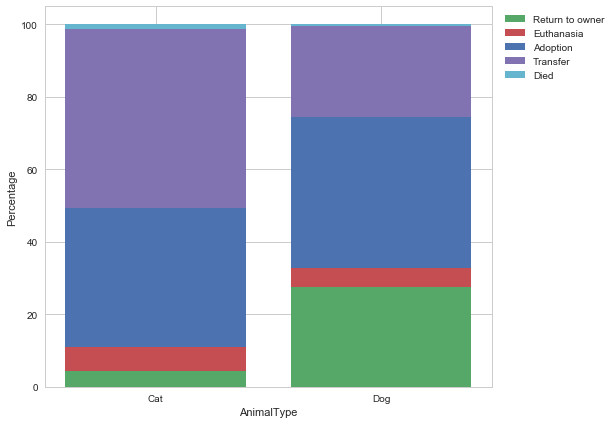

In [94]:
return_to_owner = df[df.OutcomeType == 'Return_to_owner'].groupby('AnimalType').size().values
euthanasia = df[df.OutcomeType == 'Euthanasia'].groupby('AnimalType').size().values
adoption = df[df.OutcomeType == 'Adoption'].groupby('AnimalType').size().values
transfer = df[df.OutcomeType == 'Transfer'].groupby('AnimalType').size().values
died = df[df.OutcomeType == 'Died'].groupby('AnimalType').size().values


totals = return_to_owner + euthanasia + adoption + transfer + died

r_per = return_to_owner / totals * 100
e_per = euthanasia / totals * 100
a_per = adoption / totals * 100
t_per = transfer / totals * 100
d_per = died / totals * 100

f, ax = plt.subplots(1, figsize=(8, 7))

ax.bar(range(len(r_per)), r_per, color='g', label='Return to owner')
ax.bar(range(len(e_per)), e_per, color='r', bottom=r_per, label='Euthanasia')
ax.bar(range(len(a_per)), a_per, color='b', bottom=r_per + e_per, label='Adoption')
ax.bar(range(len(t_per)), t_per, color='m', bottom=r_per + e_per + a_per, label='Transfer')
ax.bar(range(len(d_per)), d_per, color='c', bottom=r_per + e_per + a_per + t_per, label='Died')

plt.xticks(np.arange(2), ('Cat', 'Dog'))
plt.xlabel('AnimalType')
plt.ylabel('Percentage')
ax.legend(bbox_to_anchor=(1.01, 1), loc=2)

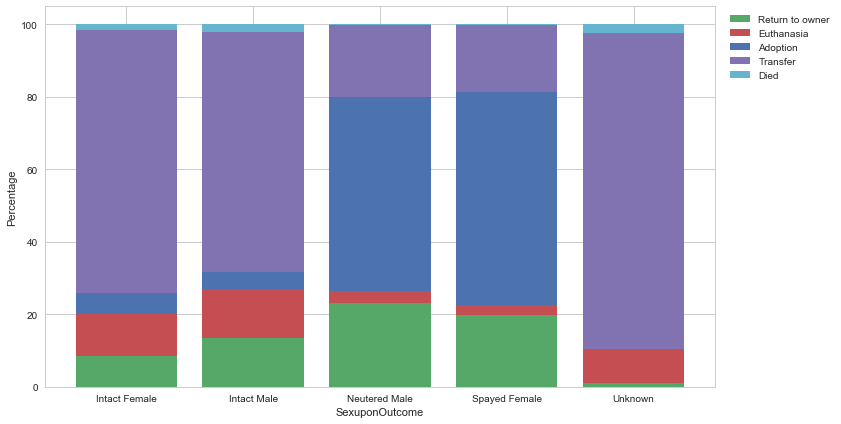

In [93]:
return_to_owner = df[df.OutcomeType == 'Return_to_owner'].groupby('SexuponOutcome').size().values
euthanasia = df[df.OutcomeType == 'Euthanasia'].groupby('SexuponOutcome').size().values
adoption = df[df.OutcomeType == 'Adoption'].groupby('SexuponOutcome').size().values
adoption = np.hstack((adoption, np.array([0])))
transfer = df[df.OutcomeType == 'Transfer'].groupby('SexuponOutcome').size().values
died = df[df.OutcomeType == 'Died'].groupby('SexuponOutcome').size().values

totals = return_to_owner + euthanasia + adoption + transfer + died

r_per = return_to_owner / totals * 100
e_per = euthanasia / totals * 100
a_per = adoption / totals * 100
t_per = transfer / totals * 100
d_per = died / totals * 100

f, ax = plt.subplots(1, figsize=(12, 7))

ax.bar(range(len(r_per)), r_per, color='g', label='Return to owner')
ax.bar(range(len(e_per)), e_per, color='r', bottom=r_per, label='Euthanasia')
ax.bar(range(len(a_per)), a_per, color='b', bottom=r_per + e_per, label='Adoption')
ax.bar(range(len(t_per)), t_per, color='m', bottom=r_per + e_per + a_per, label='Transfer')
ax.bar(range(len(d_per)), d_per, color='c', bottom=r_per + e_per + a_per + t_per, label='Died')

plt.xticks(np.arange(5), ('Intact Female', 'Intact Male', 'Neutered Male', 'Spayed Female', 'Unknown'))
plt.xlabel('SexuponOutcome')
plt.ylabel('Percentage')
ax.legend(bbox_to_anchor=(1.01, 1), loc=2)

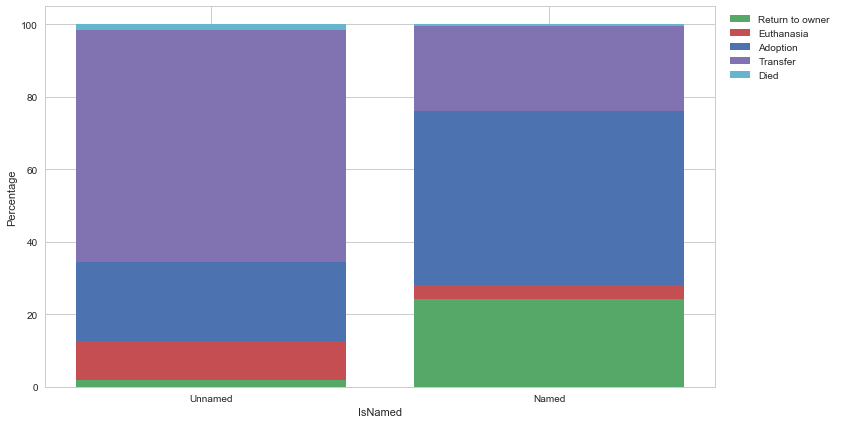

In [95]:
return_to_owner = df[df.OutcomeType == 'Return_to_owner'].groupby('IsNamed').size().values
euthanasia = df[df.OutcomeType == 'Euthanasia'].groupby('IsNamed').size().values
adoption = df[df.OutcomeType == 'Adoption'].groupby('IsNamed').size().values
transfer = df[df.OutcomeType == 'Transfer'].groupby('IsNamed').size().values
died = df[df.OutcomeType == 'Died'].groupby('IsNamed').size().values

totals = return_to_owner + euthanasia + adoption + transfer + died

r_per = return_to_owner / totals * 100
e_per = euthanasia / totals * 100
a_per = adoption / totals * 100
t_per = transfer / totals * 100
d_per = died / totals * 100

f, ax = plt.subplots(1, figsize=(12, 7))

ax.bar(range(len(r_per)), r_per, color='g', label='Return to owner')
ax.bar(range(len(e_per)), e_per, color='r', bottom=r_per, label='Euthanasia')
ax.bar(range(len(a_per)), a_per, color='b', bottom=r_per + e_per, label='Adoption')
ax.bar(range(len(t_per)), t_per, color='m', bottom=r_per + e_per + a_per, label='Transfer')
ax.bar(range(len(d_per)), d_per, color='c', bottom=r_per + e_per + a_per + t_per, label='Died')

plt.xticks(np.arange(2), ('Unnamed', 'Named'))
plt.xlabel('IsNamed')
plt.ylabel('Percentage')
ax.legend(bbox_to_anchor=(1.01, 1), loc=2)